# Image Colorization Demo
---
Este notebook realiza uma demonstração do modelo treinado para este projeto. O processo de treinamento do modelo não será refeito, para menor gasto de tempo, o modelo será carregado do arquivo XXXX.yyy.

Então, serão consideradas todas as imagens do diretório ./images como entrada. Espera-se que as imagens de entrada estejam em formato RGB, mesmo se forem imagens em preto e branco.

Nosso modelo foi treinado com imagens de paisagem.

In [ ]:
# Includes
import numpy as np
import os
import keras
from keras.preprocessing.image import img_to_array

from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
import imageio
import cv2

import matplotlib.pyplot as plt

In [ ]:
# Se for utilizar no Google Collab, considere utilizar os diretorios de seu Google Drive:
from google.colab import drive
drive.mount('/content/drive')

DIMENSION_SIZE = 256
IMAGES_PATH = './'
MODEL_PATH = '/content/drive/Shareddrives/PDI/modelo'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carregar entrada
filename = 'imgtest.jpg'

image = imageio.imread(IMAGES_PATH+filename)

Algumas das imagens de entrada:

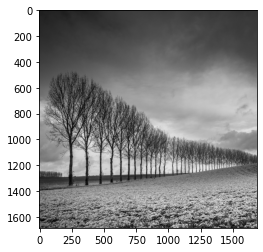

In [ ]:
plt.imshow(image)

Carregamos o modelo já treinado para esta demo, para evitar o gasto de tempo necessário para o treinamento.

In [ ]:
# Carregar Modelo
model = keras.models.load_model(MODEL_PATH)

A rede utilizada pode ser observada, por meio da função de resumo do Keras.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 128)     1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      36896     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 16)        4

## Colorização
---
À partir do modelo treinado, é possível gerar a versão colorizada da imagem de forma bastante simples, sendo apenas necessária a conversão da imagem para o espaço de cor Lab, para extração do canal de luminosidade da imagem.

In [ ]:
# Converter entrada para lab
# Alterando dimensao da imagem
inputImage = cv2.resize(image, dsize=(DIMENSION_SIZE, DIMENSION_SIZE), interpolation=cv2.INTER_CUBIC)
image = np.array(img_to_array(inputImage), dtype=float)

# Conversao para Lab e extracao do canal de luminosidade
X = rgb2lab(1.0/255*image)[:,:,0]
X = X.reshape(1, DIMENSION_SIZE, DIMENSION_SIZE, 1)

# Colorizar com modelo
output = model.predict(X)
output *= 128

O modelo apenas gera os dois únicos canais de cor, dentro do espaço Lab, e o canal de luminosidade é aproveitado da entrada, uma vez que ele já possui grande quantidade de informação importante para a imagem.

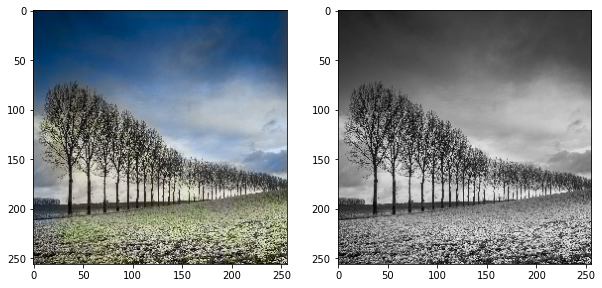

In [ ]:
# Impressão da imagem colorizada
coloredImage = np.zeros((DIMENSION_SIZE, DIMENSION_SIZE, 3))
coloredImage[:,:,0] = X.reshape(256, 256)
coloredImage[:,:,1:] = output[0]
coloredImage = lab2rgb(coloredImage)
coloredImage *= 255
coloredImage = coloredImage.astype(np.uint8)

plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(coloredImage)
plt.subplot(1,2,2)
plt.imshow(inputImage)